Параметры
**client_id** - идентификатор клиента  
**app_date** - дата подачи заявки  
**education** - уровень образования  
**sex** - пол заёмщика  
**age** - возраст заёмщика  
**car** - флаг наличия автомобиля  
**car_type** - флаг автомобиля-иномарки  
**decline_app_cnt** - количество отказанных прошлых заявок  
**good_work** - флаг наличия «хорошей» работы  
**score_bki** - оценка по версии БКИ  
**bki_request_cnt** - количество запросов в БКИ  
**region_rating** - рейтинг региона  
**home_address** - категоризатор домашнего адреса  
**work_address** - категоризатор рабочего адреса  
**income** - доход заёмщика  
**sna** - связь заемщика с клиентами банка  
**first_time** - давность наличия информации о заемщике  
**foreign_passport** - наличие загранпаспорта  
**default** - наличие дефолта  

# Загрузка данных

In [1]:
# Импортируем все необходимые библиотеки

from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# Фиксируем сразу RANDOM_SEED

RANDOM_SEED = 42

In [3]:
# Импортируем датасеты и посмотрим на них глазами

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [5]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [6]:
sample_submission.head()

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


In [7]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [8]:
test.info()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [9]:
sample_submission.info()
sample_submission.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


client_id    0
default      0
dtype: int64

In [10]:
train['Train'] = 1 # помечаем трейн
test['Train'] = 0 # помечаем тест

df = train.append(test, sort=False).reset_index(drop=True)

In [11]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0.0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0.0,1


# Предобработка

In [12]:
# Переведем время в нормальный формат
from datetime import datetime

df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')

In [13]:
df['app_date'].min()

Timestamp('2014-01-01 00:00:00')

In [14]:
df['app_date'].max()

Timestamp('2014-04-30 00:00:00')

In [15]:
# создадим новый признак, который будет показывать как давно заемщик обращался в банка

finish_day = df['app_date'].max()

df['days'] = df['app_date'].apply(lambda x: (finish_day - x).days)

In [16]:
# объеденим признаки для более удобного анализа
num_cols = ['age','decline_app_cnt','score_bki','bki_request_cnt','income', 'days']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
date_cols = ['app_date']

In [17]:
# Анализируем числовые признаки

print('Какое кол-во уникальных значений имеет каждый числовой признак')
print()

for col in num_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый числовой признак

52 - age
24 - decline_app_cnt
102618 - score_bki
40 - bki_request_cnt
1207 - income
120 - days


In [18]:
# Анализируем бинарные признаки

print('Какое кол-во уникальных значений имеет каждый бинарный признак')
print()

for col in bin_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый бинарный признак

2 - sex
2 - car
2 - car_type
2 - good_work
2 - foreign_passport


In [19]:
# Анализируем категориальные признаки

print('Какое кол-во уникальных значений имеет каждый категориальный признак')
print()

for col in cat_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый категориальный признак

5 - education
7 - region_rating
3 - home_address
3 - work_address
4 - sna
4 - first_time


Нужно заполнить пропуски с образованием. Интересно как изменится распределение, если посмотрим в разрезе хорошей работы

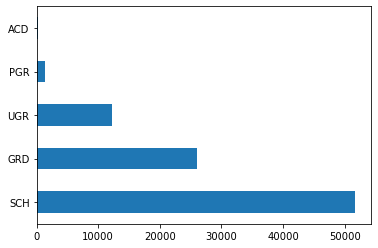

In [20]:
df[df['good_work'] == 0]['education'].value_counts().plot.barh()

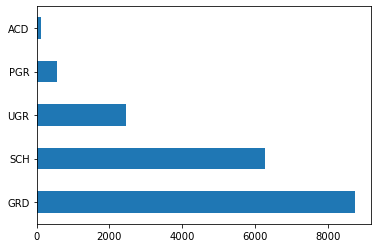

In [21]:
df[df['good_work'] == 1]['education'].value_counts().plot.barh()

мы видим, что у кого хорошая работа, то чаще образование GRD, в остальных случаях SCH.  
По такому принципу и заполним пропуски в образовании

In [22]:
# Пишем ф-цию, которая на основе работы будет заполнять пропуски с образованием

def get_education(education, good_work):
    if pd.isna(education) == True and good_work == 0:
        return 'SCH'
    elif pd.isna(education) == True and good_work == 1:
        return 'GRD'
    else:
        return education

In [23]:
df['education'] = df.apply(lambda x: get_education(x['education'], x['good_work']), axis=1)

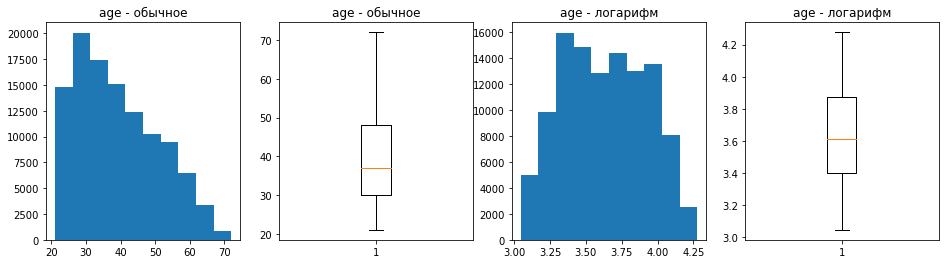

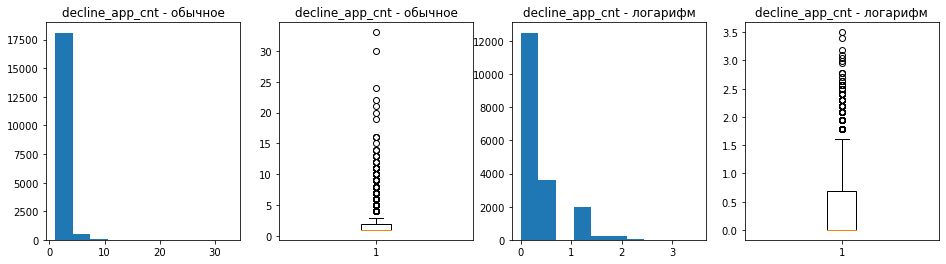

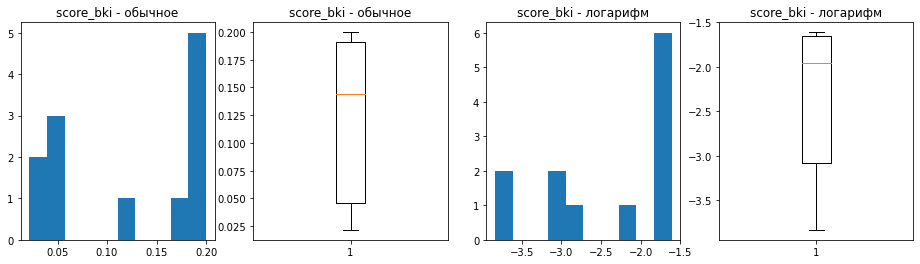

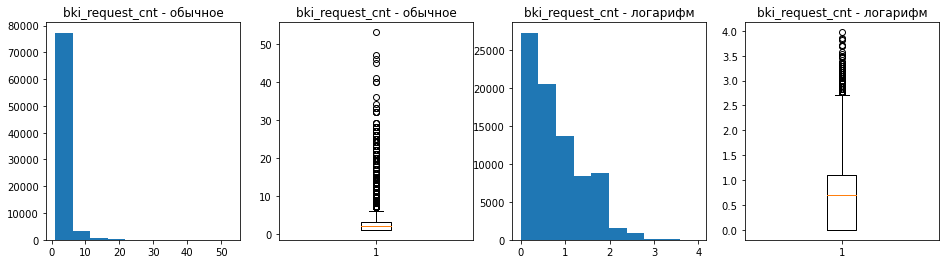

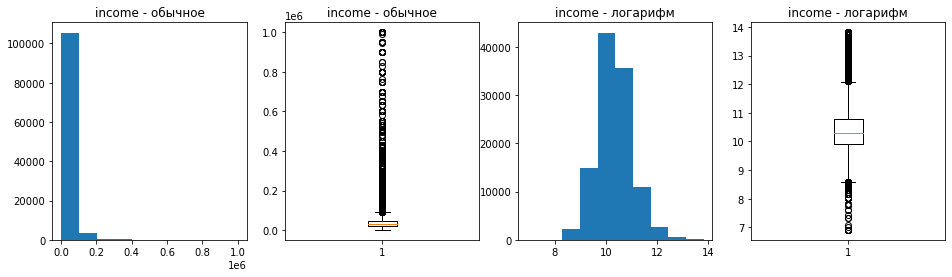

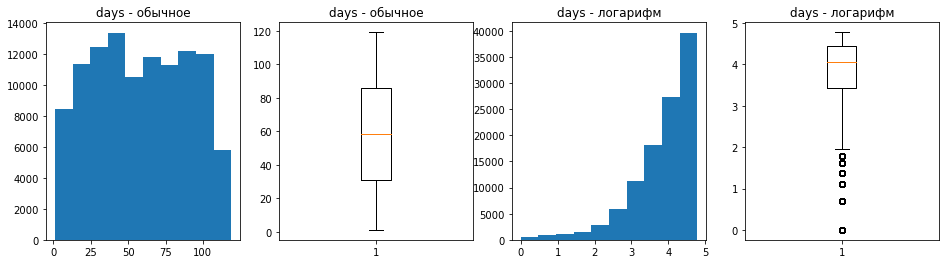

In [24]:
# Анализируем распределение числовых признаков и их логарифмов

for i in num_cols:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].hist(df[i][df[i] > 0])
    axes[0].set_title(i + ' - обычное')
    
    axes[1].boxplot(df[i][df[i] > 0])
    axes[1].set_title(i + ' - обычное')
    
    axes[2].hist(df[i][df[i] > 0].dropna().apply(lambda x: np.log(x)))
    axes[2].set_title(i + ' - логарифм')
    
    axes[3].boxplot(df[i][df[i] > 0].dropna().apply(lambda x: np.log(x)))
    axes[3].set_title(i + ' - логарифм')

In [25]:
# Есть смысл прологорифмировать только age и income
# Так распределение будет более нормальное

df[['age', 'income']] = df[['age', 'income']].apply(lambda x: np.log(x), axis=1)

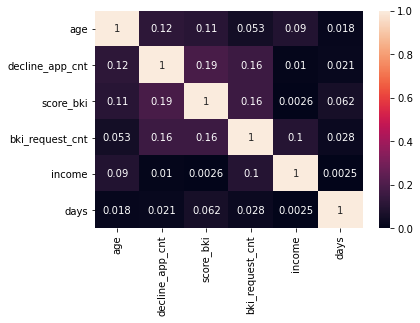

In [26]:
# Проверяем корреляцию числовых признаков

sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

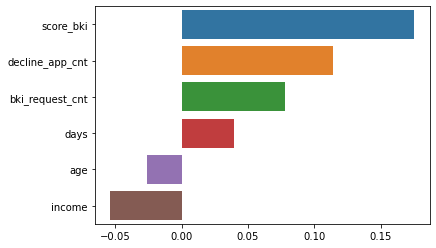

In [27]:
# Проверяем корреляцию числовых признаков к целевой переменной

correlations = df[num_cols].corrwith(df['default']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)

Корреляция низка. Соответственно это то, что нам нужно. Числовые столбцы оставляем все

# Формирование признаков

In [28]:
label_encoder = LabelEncoder()

In [29]:
# Создадим словарь, в котором будем хранить расшифровки кодировок

decoder = {}

Закодируем все признаки кроме числовых.  
Так же соберем словарь с расшифровками

In [30]:
for col in bin_cols:
  df[col] = df[[col]].apply(label_encoder.fit_transform)
  decoder[col] = dict(enumerate(label_encoder.classes_))

In [31]:
for col in cat_cols:
  df[col] = df[[col]].apply(label_encoder.fit_transform)
  decoder[col] = dict(enumerate(label_encoder.classes_))

In [32]:
decoder

{'sex': {0: 'F', 1: 'M'},
 'car': {0: 'N', 1: 'Y'},
 'car_type': {0: 'N', 1: 'Y'},
 'good_work': {0: 0, 1: 1},
 'foreign_passport': {0: 'N', 1: 'Y'},
 'education': {0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'},
 'region_rating': {0: 20, 1: 30, 2: 40, 3: 50, 4: 60, 5: 70, 6: 80},
 'home_address': {0: 1, 1: 2, 2: 3},
 'work_address': {0: 1, 1: 2, 2: 3},
 'sna': {0: 1, 1: 2, 2: 3, 3: 4},
 'first_time': {0: 1, 1: 2, 2: 3, 3: 4}}

# Смотрим значимость

In [33]:
data = df[df['Train'] == 1].isna().sum()

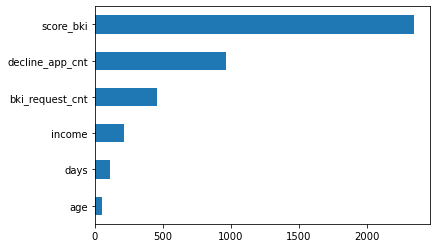

In [34]:
imp_num = pd.Series(f_classif(df[df['Train'] == 1][num_cols],
                              df[df['Train'] == 1]['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

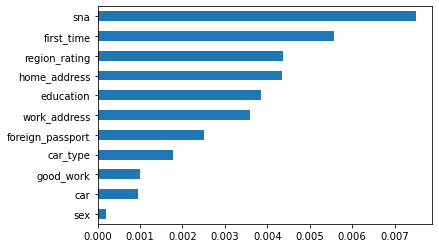

In [35]:
imp_cat = Series(mutual_info_classif(df[df['Train'] == 1][bin_cols + cat_cols], df[df['Train'] == 1]['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Строим модель

In [36]:
# Делим датасет на обучающий и тестовый

train = df[df['Train'] == 1].drop(['Train', 'app_date', 'client_id'], axis=1)
test = df[df['Train'] == 0].drop(['Train', 'app_date', 'client_id'], axis=1)

In [37]:
X = train.drop(['default'], axis=1)
y = train['default']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


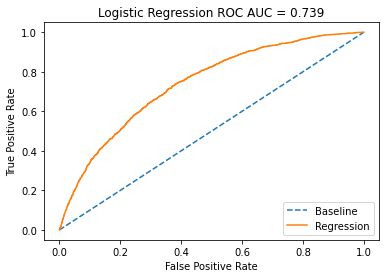

In [39]:
# строим саму модель и смотрим результаты

model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Поиск оптимальных параметров

In [40]:
model = LogisticRegression()

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']} 
]

gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

## печатаем параметры
best_parameters = model.get_params()
for param_name in best_parameters:
        print(param_name, best_parameters[param_name], '\n')

C 1.0 

class_weight balanced 

dual False 

fit_intercept True 

intercept_scaling 1 

l1_ratio None 

max_iter 100 

multi_class auto 

n_jobs None 

penalty none 

random_state None 

solver newton-cg 

tol 0.0001 

verbose 0 

warm_start False 



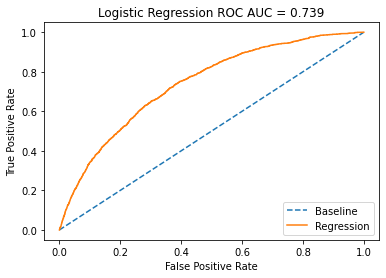

In [41]:
# строим модель с лучшими параметрами и смотрим результаты

new_model = LogisticRegression(random_state = None, 
                               C = 1.0, 
                               class_weight = 'balanced', 
                               dual = False, 
                               fit_intercept = True, 
                               intercept_scaling = 1, 
                               l1_ratio = None, 
                               max_iter = 100, 
                               multi_class = 'auto', 
                               n_jobs = None, 
                               penalty = 'none', 
                               solver = 'newton-cg', 
                               tol = 0.0001,
                               verbose = 0, 
                               warm_start = False)
new_model.fit(X_train, y_train)

probs = new_model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Submission

In [42]:
test_data = df[df['Train'] == 0].drop(['Train'], axis=1)

In [43]:
X = test_data.drop(['default', 'client_id', 'app_date'], axis=1)

In [44]:
predict_submission = new_model.predict_proba(X)[:, 1]

submit = test_data[['client_id']]
submit['default']=predict_submission
submit.to_csv('submission.csv', index=False)
display(submit.head(10))

<ipython-input-44-ff372598d0e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['default']=predict_submission


,client_id,default
73799,74835,0.217401
73800,17527,0.806020
73801,75683,0.350679
73802,26883,0.407408
73803,28862,0.158145
73804,99881,0.747366
73805,26630,0.754103
73806,79934,0.208670
73807,16605,0.158927
73808,105449,0.179924
